In [2]:
import pandas as pd
from glob import glob
def getDataFromDay(day):
    dataframes = []
    for f in glob(day+"/*.json"):
        dataframes.append(pd.read_json(f,lines=True))
    dataDay = pd.concat(dataframes)
    return(dataDay)
def extractUserData(data):
    captured_keys = ['friends_count','favourites_count', 'description','screen_name', 'geo_enabled', 'lang', 'verified','time_zone','statuses_count', 'followers_count', 'following', 'name', 'location','created_at']
    users = set()
    userData = {}
    for key in captured_keys:
        userData[key] = []
    for ind,val in data.iterrows():
        if val['user']['name'] not in users:
            users.add(val['user']['name'])
            for key in captured_keys:
                userData[key].append(val['user'][key])
    userFrame = pd.DataFrame()
    for key in userData.keys():
        print(key,len(userData[key]))
        userFrame[key] = userData[key]
    return userFrame

def getRetweetData(data_1):
    user_dict = {}
    follower_dict = {}
    account_creation_dict = {}
    location_dict = {}
    hashtag_dict = {}
    #if statement, to count of often a user is retweeted in the user_dict
    for retweeted in data_1['retweeted_status']:
        if retweeted['user']['name'] in user_dict.keys():
            user_dict[retweeted['user']['name']] += 1
        else:
            user_dict[retweeted['user']['name']] = 1 #also get the user's follower_count, created date, location, and used hasgtags
            follower_dict[retweeted['user']['name']] = retweeted['user']['followers_count']
            account_creation_dict[retweeted['user']['name']] = retweeted['user']['created_at']
            location_dict[retweeted['user']['name']] = retweeted['user']['location']
            hashtag_dict[retweeted['user']['name']] = retweeted['entities']['hashtags']


    retweet_data = pd.DataFrame()
    retweet_data['user'] = list(user_dict.keys())
    retweet_data['retweeted'] = list(user_dict.values())
    retweet_data['followers_count'] = list(follower_dict.values())
    retweet_data['created_at'] = list(account_creation_dict.values())
    retweet_data['location'] = list(location_dict.values())
    retweet_data['hastags'] = list(hashtag_dict.values())
    return retweet_data

In [3]:
data_23 = getDataFromDay("2017-09-23")
data_23_user = extractUserData(data_23)

friends_count 37708
favourites_count 37708
description 37708
screen_name 37708
geo_enabled 37708
lang 37708
verified 37708
time_zone 37708
statuses_count 37708
followers_count 37708
following 37708
name 37708
location 37708
created_at 37708


In [4]:
data_23_user

,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at
0,2277,3059,citizen of the world and staunch remainer.,verokins,True,en,False,None,7599,1075,None,Veronica ♥️🇪🇺🇬🇧,Norwich UK 🇪🇺,Tue Jan 20 13:21:33 +0000 2009
1,2260,496,"I am a f/t carer, part time volunteer @AVRBITT...",TimWorth1,True,en,False,London,68025,1808,None,τ!m ω0ɍ†ɧ,Bristol,Thu Mar 26 15:54:28 +0000 2009
2,130,666,Pandora's box,McEwanMorton,False,en,False,None,12074,76,None,McE.Morton,None,Wed Sep 01 21:05:50 +0000 2010
3,2708,4628,"Chercheur expatrié, actualité politique et spo...",Vert_Galant,True,en,False,London,44922,993,None,HenriIV,None,Thu May 19 06:19:48 +0000 2011
4,58,4653,None,Hughcampx,False,en,False,None,4814,37,None,Hugh C,None,Tue Jul 04 16:17:58 +0000 2017
5,235,0,Global Stock Brokers for the global on-line an...,globalbrokers,False,en,False,None,44458,864,None,Global Stock Broker,Mauritius and Gibraltar,Tue Jul 21 20:27:52 +0000 2009
6,185,952,En crisi permanent. No miro la TV. Lifelong Jo...,BCNRoger,True,es,False,Berlin,1097,50,None,BCNRoger /\ZI/\,"Horta, Catalonia.",Fri Jan 11 13:20:27 +0000 2013
7,1662,6660,🏴󠁧󠁢󠁳󠁣󠁴󠁿 #BEtheSPIDER Visca Catalunya lliure! #...,tradasro,False,en,False,Pacific Time (US & Canada),21710,1956,None,Tradasro,Toronto / Blairgowrie SCOTLAND,Tue Aug 26 21:49:13 +0000 2014
8,4967,2953,I believe #humanrights are being crushed by un...,giDwF,False,en-GB,False,None,3383,3107,None,giantDWARF,"Sheffield, England",Mon Mar 14 03:08:29 +0000 2016
9,1440,50661,Time to point and laugh at right wing snowflak...,LiberalIsland,True,en,False,None,86063,4097,None,liberalisland,NOT going away!,Tue Feb 25 18:06:31 +0000 2014


In [ ]:
data_23_user[data_23]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = data_23_user.copy()

In [7]:
locations = data['location'].value_counts()
df_locations = pd.DataFrame(locations)

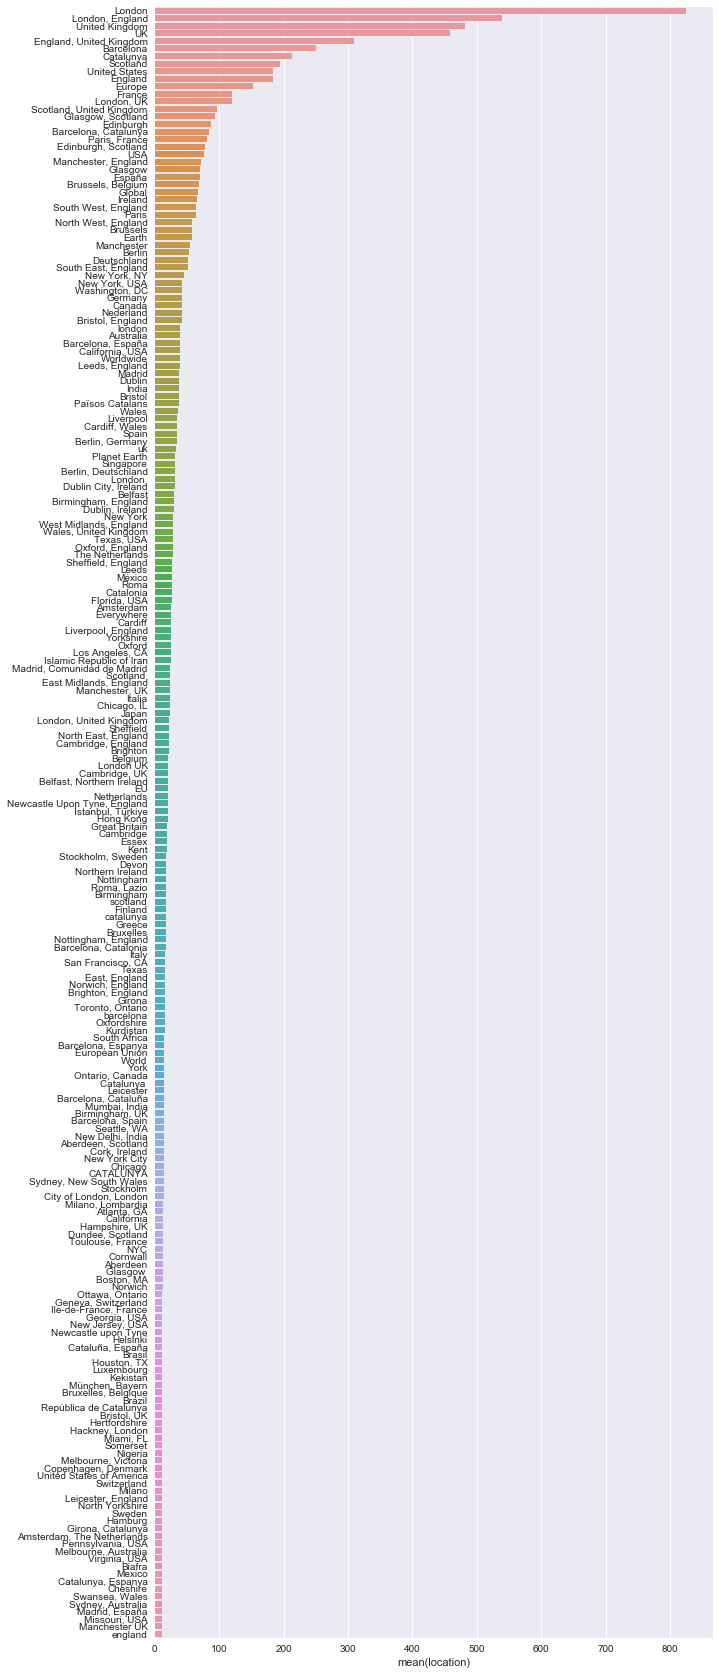

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 30)
sns.barplot(y=df_locations[df_locations['location'] > 10].index,x=df_locations[df_locations['location'] > 10]['location'],ax=ax)
for tick in ax.get_yticklabels():
    tick.set_rotation(0)
plt.show()

In [9]:
sub_locations = df_locations[df_locations['location'].index.str.contains(',')]

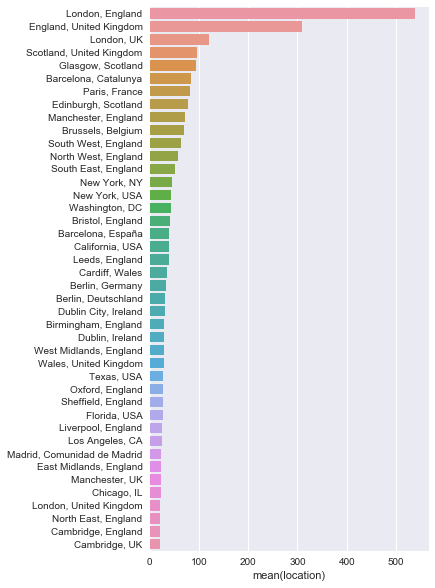

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
sns.barplot(y=sub_locations[sub_locations['location'] > 20].index,x=sub_locations[sub_locations['location'] > 20]['location'],ax=ax)

In [11]:
fdata = data_23_user.sort_values(by="followers_count",ascending=False)

In [12]:
fdata

,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at
22903,231,417,advertising: talk.instagram@gmail.com,Notebook,False,en,True,Pacific Time (US & Canada),53004,6048871,None,The Notebook,None,Mon Jan 03 06:03:46 +0000 2011
2660,1765,2325,⛽️⛽️⛽️⛽️⛽️⛽️,lilyallen,True,en,True,London,24168,5966123,None,lily,WLDN,Mon Oct 27 13:23:17 +0000 2008
1117,0,5372,Motiverende Spreker | Blijf altijd dicht bij j...,Oceaanfietser,True,nl,False,Amsterdam,17623,5238952,None,Ebrahim Hemmatnia,Nederland,Sun Apr 03 11:52:44 +0000 2011
11276,176,4,Periodismo con carácter.,Milenio,False,es,True,Mexico City,512233,3971717,None,Milenio.com,México,Tue Mar 17 22:26:38 +0000 2009
28877,137,151,Expansión en alianza con CNN. Primer portal de...,ExpansionMx,True,es,True,Mexico City,471921,3904162,None,Expansión CNN,México,Tue Jan 26 22:41:22 +0000 2010
6721,15716,25,"Take me on an adventure ✈️ ,We don't own any o...",TheWorldStories,True,en,False,Chennai,60386,3340609,None,Travel Scenes ✈️,see link below,Tue Apr 19 08:44:53 +0000 2011
9485,3824,4,A picture is worth a thousand words! We don't ...,RealTouchingPic,False,en,False,New Delhi,4237,2183673,None,Pics With a Story,Don't forget to 'RT' if you like,Tue May 28 05:17:01 +0000 2013
26184,153,33,"✴Sharing quotes, excerpts and poetry, mostly f...",TheIifePost,True,en,False,Pacific Time (US & Canada),249092,2065530,None,My Thoughts :),None,Sun Nov 18 06:56:50 +0000 2012
10277,92,601,¿Sabias Que? Curiosidades. Cuenta sobre todo t...,sabiastuque_,False,es,False,Madrid,44060,2044762,None,Sabias? Curiosidades,España,Sat Jul 10 16:45:22 +0000 2010
6531,162,144,Cuenta de Twitter oficial. Sigue también a @La...,lajornadaonline,False,es,True,Mexico City,167593,1982409,None,La Jornada,México,Tue Apr 28 03:40:43 +0000 2009


In [13]:
data_1 = data_23[pd.notnull(data_23['retweeted_status'])] #I want to remove all the NaN values in retweeded_status

In [14]:
data_retweet = getRetweetData(data_1)

In [15]:
data_retweet.sort_values(by='retweeted',inplace=True,ascending=False)

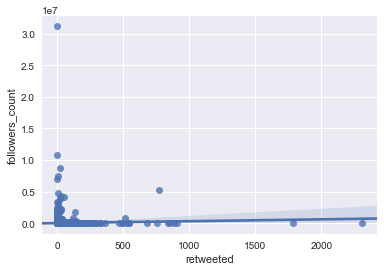

In [16]:
ax = sns.regplot(x='retweeted',y='followers_count',data=data_retweet)

In [17]:
from scipy.stats import pearsonr

pearsonr(data_retweet['retweeted'],data_retweet['followers_count'])

(0.032176240484498991, 0.016080877630393807)

In [18]:
data_retweet_f = data_retweet.sort_values(by='followers_count',ascending=False)

In [19]:
data_retweet_f

,user,retweeted,followers_count,created_at,location,hastags
3963,Harry Styles.,2,31174019,Sun Aug 22 14:19:06 +0000 2010,None,"[{'indices': [54, 70], 'text': 'RefugeesWelcom..."
3995,China Xinhua News,1,10781063,Thu Feb 09 01:10:18 +0000 2012,"Headquartered in Beijing, PRC","[{'indices': [0, 9], 'text': 'BREAKING'}, {'in..."
236,BBC News (UK),22,8761327,Mon Jan 08 08:05:57 +0000 2007,London,"[{'indices': [5, 12], 'text': 'Brexit'}, {'ind..."
3245,Le Monde,6,7478440,Mon Mar 16 18:44:51 +0000 2009,Paris,"[{'indices': [8, 15], 'text': 'Brexit'}]"
3096,Miranda Lambert,1,6960695,Thu Apr 23 21:37:36 +0000 2009,USA,"[{'indices': [89, 105], 'text': 'musicismedici..."
413,Ebrahim Hemmatnia,773,5238977,Sun Apr 03 11:52:44 +0000 2011,Nederland,"[{'indices': [59, 62], 'text': 'EU'}, {'indice..."
351,Department of State,4,4725960,Tue Oct 23 15:02:45 +0000 2007,"Washington, DC","[{'indices': [45, 59], 'text': 'EuropeanUnion'..."
666,Sky News,28,4298286,Thu Jul 19 14:42:53 +0000 2007,"London, UK",[]
383,CGTN,48,4180750,Thu Jan 24 03:18:59 +0000 2013,"Beijing, China","[{'indices': [6, 9], 'text': 'UK'}, {'indices'..."
2418,Milenio.com,22,3971719,Tue Mar 17 22:26:38 +0000 2009,México,"[{'indices': [29, 38], 'text': 'Norcorea'}, {'..."
